In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sn
%matplotlib inline
plt.style.available
plt.style.use('bmh')

In [2]:
#set defaults
sn.set()
#plt.rc('lines',linewidth=2)
#plt.rc('axes',facecolor='#E6E6E6',edgecolor='none')
#plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
#plt.rc('patch', edgecolor='#E6E6E6')

In [3]:
#Create a dataframe for continents and population for every 5 years
population={'Oceania':(12.6,14.2,15.8,17.6,19.7,21.5,23,24.9,27.1,29.2,31.2,33.6,36.6,39.5,42.4),
            'North America':(172.6,187.6,204.8,219.6,231.1,242.5,254.4,266.8,280.3,295.1,312.8,327.5,342.9,356,369.2), 
            'South America':(168.9,193.2,221.1,253.4,288.1,325.3,364.3,405.1,445.9,486.9,525.8,561.7,597.6,632.4,664.5), 
            'Europe':(549.4,577.1,605.9,635.3,657.4,677.6,694.2,708.2,721.7,728.1,727.2,730.3,737.2,740.8,743.4), 
            'Africa':(228.7,254,285.1,322.5,366.5,417.9,480,552.8,634.6,722.9,817.6,924.8,1049.4,1194.3,1352.6), 
            'Asia':(1404.1,1546.1,1700.5,1891.2,2137.8,2394.3,2642.5,2916,3221.3,3489.3,3730.4,3964.3,4194.4,4419.9,4623.5)}
continentData=pd.DataFrame(population)
years=[1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]
indices=pd.DatetimeIndex(['1950','1955','1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2015','2020'])
continentData.index=indices.format(formatter=lambda x: x.strftime('%Y'))
continentData

,Oceania,North America,South America,Europe,Africa,Asia
1950,12.6,172.6,168.9,549.4,228.7,1404.1
1955,14.2,187.6,193.2,577.1,254.0,1546.1
1960,15.8,204.8,221.1,605.9,285.1,1700.5
1965,17.6,219.6,253.4,635.3,322.5,1891.2
1970,19.7,231.1,288.1,657.4,366.5,2137.8
1975,21.5,242.5,325.3,677.6,417.9,2394.3
1980,23.0,254.4,364.3,694.2,480.0,2642.5
1985,24.9,266.8,405.1,708.2,552.8,2916.0
1990,27.1,280.3,445.9,721.7,634.6,3221.3
1995,29.2,295.1,486.9,728.1,722.9,3489.3


In [4]:
def draw_chart(year2,year1=1950):
    
    #translate year to index
    index1=int((year1-1950)/5)
    index2=int((year2-1950)/5)
    
    #clear plot elements so each iteration is completely overwritten 
    ax.clear()
    
    #make the axis limits stagnant for each run !
    plt.axis([0,14,0,5000])
    
    #specify the axes labels and tick locations
    ax.set_xlabel('Year')
    ax.set_ylabel('Population in Millions')
    loc = mpl.ticker.MultipleLocator(500)
    ax.yaxis.set_minor_locator(loc)
    plt.grid(which='minor')
    
    #plot each continent's data
    ax.plot(continentData.iloc[index1:index2,5],color='sienna',label='Asia')
    ax.plot(continentData.iloc[index1:index2,4],color='indigo',label='Africa')
    ax.plot(continentData.iloc[index1:index2,3],color='blue',label='Europe')
    ax.plot(continentData.iloc[index1:index2,2],color='orange',label='South America')
    ax.plot(continentData.iloc[index1:index2,1],color='forestgreen',label='North America')
    ax.plot(continentData.iloc[index1:index2,0],color='red',label='Oceania')  
    
    #make the legend and name the plot
    plt.legend(loc='upper left',framealpha=0,fontsize='small',ncol=2)
    ax.set_title('Population of Each Continent')

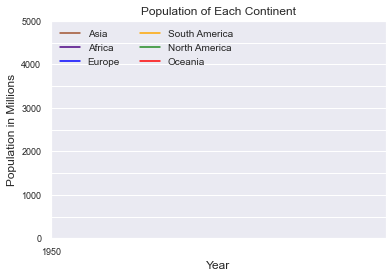

In [5]:
#create the base figure
fig,ax=plt.figure(),plt.axes()
#continentData.iloc[1:3,1]
#draw_chart(1960)
#animator=an.FuncAnimation(fig, draw_chart,frames=range(1950,2020))
#try to animate the graph
animator=animation.FuncAnimation(fig,draw_chart,frames=range(1955,2030,int(3)))
HTML(animator.to_jshtml())

In [6]:
#create subplot version using a basemap if i have time